# Ensemble Learning Exercise

## 1. Implementing Random Forest From Scratch (30 points)
In this exercise you will need to implement a simple version of Random Forest Regressor from scratch. Your model will handle **continuous input and output**. 

1.1. Compelete the skeleton class below (you should use scikit-learn's `DecisionTreeRegressor` model that the `TreeEnsemble` will use)
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `n_trees` is the number of trees to create
  - `sample_sz` is the size of the sample set to use of each of the trees in the forest (chose the samples randomly, with or without repetition)
  - `n_features` is the size of features to sample. This can be a natrual number > 0, or a ratio of the features as a number in range (0,1]
  - `min_leaf` is the minimal number of samples in each leaf node of each tree in the forest
  

1.2. The `predict` function will use mean of the target values of the trees. The result is a vector of predictions matching the number of rows in `X`.

1.3. The `oob_mse` function will compute the mean squared error over all **out of bag (oob)** samples. That is, for each sample calculate the squared error using  predictions from the trees that do not contain x in their respective bootstrap sample, then average this score for all samples. See:  [OOB Errors for Random Forests](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html).

1.4. To check your random forest implementation, use the boston dataset (`from sklearn.datasets import load_boston`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
for n in [1,5,10,20,50,100]:
  for sz in [50,100,300,500]:
    for min_leaf in [1,5]:
      forest = TreeEnsemble(X, y, n, sz, min_leaf)
      mse = forest.oob_mse()
      print("n_trees:{0}, sz:{1}, min_leaf:{2} --- oob mse: {3}".format(n, sz, min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = forest.predict(X)  # forest is the chosen model
  plt.scatter(y_hat, y)
  ```
 


In [186]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

class TreeEnsemble():
    def __init__(self, X, y, n_trees, sample_sz, n_features, min_leaf):
        # let get the number of features, not fraction:
        if n_features < 1:
            self.n_features = round(X.shape[1] * n_features)
        else:
            self.n_features = n_features
        self.trees = []
        self.features = []
        self.n_trees = n_trees
        self.row_indexes = []
        self.X = X
        self.y = y
        for i in range(self.n_trees):
            ind_rows = np.random.choice(X.shape[0], sample_sz, replace=True)
            ind_features = np.random.choice(X.shape[1], self.n_features, replace=False)
            x_sample = X.iloc[ind_rows,:].iloc[:,ind_features]
            y_sample = y.iloc[ind_rows]
            tree = DecisionTreeRegressor(min_samples_leaf=min_leaf).fit(x_sample, y_sample)
            self.trees.append(tree)
            self.features.append(ind_features)
            self.row_indexes.append(ind_rows)


    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for i in range(self.n_trees):
            tree = self.trees[i]
            ind_features = self.features[i]
            prediction = tree.predict(X.iloc[:,ind_features])
            predictions += prediction / self.n_trees
        return prediction

    def oob_mse(self):
        all_indexes = set(range(self.X.shape[0]))
        mse = 0
        for i in range(self.n_trees):   
            ind_rows = list(all_indexes - set(self.row_indexes[i]))
            if len(ind_rows) == 0:
                continue
            ind_features = self.features[i]
            # print(ind_rows,ind_features)
            x_sample = self.X.iloc[ind_rows,:].iloc[:,ind_features]
            y_sample = self.y.iloc[ind_rows]
            pred = self.trees[i].predict(x_sample)
            mse +=  mean_absolute_error(pred,y_sample) / self.n_trees
        return mse


In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
X = pd.DataFrame(boston)
Y = pd.DataFrame(boston_dataset.target)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=317)

In [179]:
ens = TreeEnsemble(X_train, Y_train, n_trees=15, sample_sz=100, n_features=5, min_leaf=5)
ens.oob_mse()

4.811862003859367

In [200]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(max_depth=2, random_state=0,oob_score=True)
clf.fit(X_train, Y_train)
clf.oob_score_

/var/folders/w6/3gxjz5p507nbml8f724sbh_r0000gn/T/ipykernel_28790/1330144751.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


0.7136002370582393

In [204]:
for n in [1,5,10,20,50,100]:
  for sz in [50,100,300,500]:
    for min_leaf in [1,5]:
      forest = TreeEnsemble(X=X, y=Y, n_trees=n, sample_sz=sz, min_leaf=min_leaf, n_features=5)
      mse = forest.oob_mse()
      print("n_trees:{0}, sz:{1}, min_leaf:{2} --- oob mse: {3}".format(n, sz, min_leaf, mse))

n_trees:1, sz:50, min_leaf:1 --- oob mse: 4.283150984682713
n_trees:1, sz:50, min_leaf:5 --- oob mse: 5.57809211211837
n_trees:1, sz:100, min_leaf:1 --- oob mse: 4.506746987951808
n_trees:1, sz:100, min_leaf:5 --- oob mse: 3.5502823786519437
n_trees:1, sz:300, min_leaf:1 --- oob mse: 5.57452807646356
n_trees:1, sz:300, min_leaf:5 --- oob mse: 5.406814420803783
n_trees:1, sz:500, min_leaf:1 --- oob mse: 5.792742551566081
n_trees:1, sz:500, min_leaf:5 --- oob mse: 4.1777165062916355
n_trees:5, sz:50, min_leaf:1 --- oob mse: 6.1320604282724815
n_trees:5, sz:50, min_leaf:5 --- oob mse: 4.564859740715522
n_trees:5, sz:100, min_leaf:1 --- oob mse: 4.136296624755682
n_trees:5, sz:100, min_leaf:5 --- oob mse: 5.34863311929926
n_trees:5, sz:300, min_leaf:1 --- oob mse: 4.440952425580851
n_trees:5, sz:300, min_leaf:5 --- oob mse: 4.856677933186704
n_trees:5, sz:500, min_leaf:1 --- oob mse: 4.0523678371896334
n_trees:5, sz:500, min_leaf:5 --- oob mse: 4.74162747281836
n_trees:10, sz:50, min_leaf:

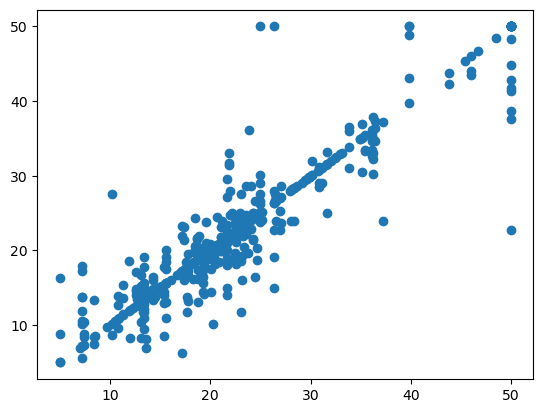

In [206]:
import matplotlib.pyplot as plt
# n_trees:1, sz:300, min_leaf:1 --- oob mse: 3.9354166666666663
forest = TreeEnsemble(X=X, y=Y, n_trees=1, sample_sz=300, min_leaf=1, n_features=5)

y_hat = forest.predict(X)  # forest is the chosen model
plt.scatter(y_hat, Y)

## 2. Implementing AdaBoost From Scratch (30 points)


2.1.   Implement the AdaBoost algorithm for classification task. Your `AdaBoost` class should receive a method for creating a weak learner, which has a fit and predict methods (**hint**: you can simulate re-weighting of the samples by an appropriate re-sampling of the train set).

2.2.   Use your model to find a strong classifier on the sample set given below, using $n$ weak learners:

2.2.1. For the base weak learners, use any classifier you want (check different types with different configuration, keep them simple = Weak). 

2.2.2. Split the sample set into train and test sets.

2.2.3 Plot the final decision plane of your classifier for $n\in \{1, 2, 3, 5, 10, 50\}$, and visualize the final iteration weights of the samples in those plots.
    - How does the overall train set accuracy changes with $n$?
    - Does you model starts to overfit at some point?





In [369]:
import numpy as np
import pandas as pd


class AdaBoost():
    def __init__(self, weak_learner, n_learners=50):
        self.weak_learner = weak_learner
        self.n_learners = n_learners
        self.learners = []
        self.alphas = []

    def fit(self, X, y):
        n_samples, _ = X.shape
        for i in range(self.n_learners):
            w = np.ones(n_samples) / n_samples
            learner = self.weak_learner
            learner.fit(X, y, sample_weight=w)
            predictions = learner.predict(X)
            error = np.sum(w[predictions != y])
            alpha = 0.5 * np.log((1 - error) / error)
            w *= np.exp(-alpha * y * predictions)
            w /= np.sum(w)
            self.learners.append(learner)
            self.alphas.append(alpha)
            X, y = self.resample(X, y, w)


    def resample(self, X, y, w):
        # Combine the data, target, and weights into a single DataFrame
        combined = pd.DataFrame(np.hstack((X, np.vstack((y, w)).T)))
        # Resample the DataFrame based on the weights
        df_resampled = combined.sample(n=len(y), replace=True, weights=combined.iloc[:,-1])

        return df_resampled.iloc[:,:X.shape[1]], df_resampled.iloc[:,X.shape[1]:-1].squeeze()



    def predict(self, X):
        n_samples, _ = X.shape
        y_pred = np.zeros(n_samples)
        for learner, alpha in zip(self.learners, self.alphas):
            y_pred += alpha * learner.predict(X)
        y_pred = np.sign(y_pred)
        return y_pred


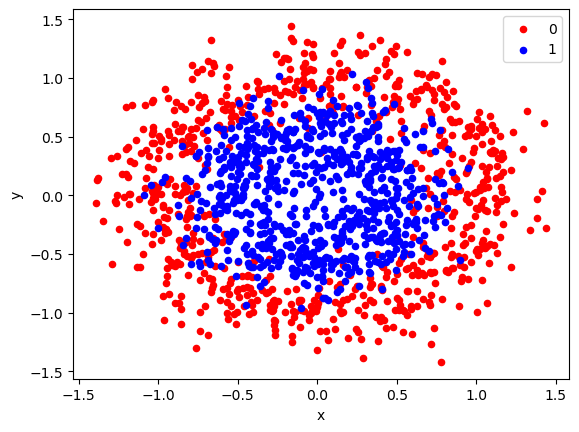

In [207]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=1500, noise=0.2, random_state=101, factor=0.5)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_absolute_error

X, y = make_circles(n_samples=1500, noise=0.2, random_state=101, factor=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=317)


In [370]:

for learner in [DecisionTreeClassifier(max_depth=1),GaussianNB(),Perceptron(),SGDClassifier()]:

# for learner in [DecisionTreeClassifier]:
    for n in [1,2,3,5,10,50]:
        ada = AdaBoost(weak_learner=learner, n_learners=n)
        ada.fit(X_train,y_train)
        y_pred = ada.predict(X_test)
        print(f'For {learner}: n={n}, the mse={mean_absolute_error(y_test,y_pred):.4f}')

For DecisionTreeClassifier(max_depth=1): n=1, the mse=0.4433
For DecisionTreeClassifier(max_depth=1): n=2, the mse=0.4433
For DecisionTreeClassifier(max_depth=1): n=3, the mse=0.4533
For DecisionTreeClassifier(max_depth=1): n=5, the mse=0.4533
For DecisionTreeClassifier(max_depth=1): n=10, the mse=0.4533
For DecisionTreeClassifier(max_depth=1): n=50, the mse=0.4533
For GaussianNB(): n=1, the mse=0.1100
For GaussianNB(): n=2, the mse=0.3433
For GaussianNB(): n=3, the mse=0.4100
For GaussianNB(): n=5, the mse=0.4400
For GaussianNB(): n=10, the mse=0.4533
For GaussianNB(): n=50, the mse=0.4533
For Perceptron(): n=1, the mse=0.4233
For Perceptron(): n=2, the mse=0.4067
For Perceptron(): n=3, the mse=0.4267
For Perceptron(): n=5, the mse=0.5200
For Perceptron(): n=10, the mse=0.4933
For Perceptron(): n=50, the mse=0.4533
For SGDClassifier(): n=1, the mse=0.5467
For SGDClassifier(): n=2, the mse=0.4533
For SGDClassifier(): n=3, the mse=0.5467
For SGDClassifier(): n=5, the mse=0.5467
For SGDC

## 3. Boosting Trees from Scratch (40 points)
1. Use the scikit-learn's DecisionTreeRegressor (again :) with `max_depth = 1` (stumps)  to write a L2Boost model which minimize the L2 square loss iteration by iteration.
Reminder: in each step, build a decision tree to minimize the error between the true label and the accumulated (sum) of the previous step predictions.
![alt text](https://explained.ai/gradient-boosting/images/latex-321A7951E78381FB73D2A6874916134D.svg)
2. Use the Boston dataset to plot the MSE as a function of the number of trees for a logspace of `n_trees` up to 1,000. What is the optimal value of `n_trees`? of learning rate?
3. Compare the performance with a deep DecisionTreeRegressor (find the optimal `max_depth`).  Who wins?
4. Add an early-stopping mechanisim to the GBTL2 model to use a validation set to detect over-fit.